# Predict if the client will subscribe a term deposit

### Table of Contents

* **[OVERVIEW](#OVERVIEW)**
    
* **[Data Exploration](#Data-Preparation)**  
    * [Identify the data issues](#Identify-the-data-issues)
        * [Checking for missing Values](#Checking-for-missing-Values)
        * [Checking Zero values](#Checking-0-values)
        * [Checking Unique Values](#Checking-Unique-Values)
        * [Check Deuplicate values](#Check-Deuplicate-values)
* **[Data visualziation](#Data-visualziation)**
    * [Histograms for dataset features](#Histograms-for-dataset-features)
    * [Finding outliers](#Finding-outliers)
    * [Plot outliers](#Plot-outliers)
    * [Finding corelations](#Finding-corelations-of-all-data-attributes-with-target-variable)
* **[Data Preparation](#Data-Preparation)**
    * [Data Cleaning](#Data-Cleaning)
        * [Remove Duplicate Values](#Remove-Duplicate-Values)
        * [Remove outliers](#Remove-outliers )
        * [Filter based on thresholds](#Filter-based-on-thresholds)
* **[Data Encoding](#Data-Encoding)**            
    * [Binay Encoding](#Binay-Encoding)
    * [Label Encoding Encoding](#Label-Encoding)
* **[Data Correlation](#Data-Correlation)**            
    * [Finding correlation of features](#Finding-correlation-of-features)
    * [Visualize Correlation matrix](#Visualize-Correlation-matrix)
    * [Top 20 positive and negative correlation features](#Top-20-positive-and-negative-correlation-features)
* **[Feature Selection](#Data-Correlation)** 
    * [RandomForestRegressor](#RandomForestRegressor)
* **[PCA](#PCA)**            
    * [PCA analysis](#PCA-analysis)
* **[Modeling](#Modeling)**
	* [Creating datasets for modeling](#Creating-datasets-for-modeling)
	* [Model-Iteration 1 (With selected features):](#Model-Iteration-1)
        * [LogisticRegression](#LogisticRegression)
        * [Decision Tree Classifier](#Decision-Tree-Classifier)
        * [KNeighbors Classifier](#KNeighbors-Classifier)
        * [Compare Results for various classifiers](#Compare-Results-for-various-classifiers)
	* [Model-Iteration 2 (With PCA features):](#Model-Iteration-2)
        * [LogisticRegression](#LogisticRegression)
        * [Decision Tree Classifier](#Decision-Tree-Classifier)
        * [KNeighbors Classifier](#KNeighbors-Classifier)
        * [Compare Results for various classifiers](#Compare-Results-for-various-classifiers)
* **[Deployment](#Deployment)**
    * [Summary of Classification Models](#Summary-of-Classification-Models-for-Term-Deposit-Subscription)
    * [Recommendations](#Recommendations)
    * [Next Steps and Recommendations](#Next-Steps-and-Recommendations)

# The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).?

## OVERVIEW

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Data Exploration

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [219]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from warnings import filterwarnings 
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno # Library to visualize missing values
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Import Data

In [220]:
# Read data
# Load the dataset
data = pd.read_excel('data/bank_additional.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [221]:
# Set the display to maximum columns so we don't miss anything
pd.set_option('display.max_columns', None)

# Turn off truncation of long values in column cells
pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_colwidth')

In [222]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [223]:
# Find missing values and print columns with missing values
missing_values = data.isna().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


<div style="background-color: #e8f3fe; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
<b>Observation:</b>You can observe no null values in the dataset.
</div>

## Identify the data issues

### Checking for missing Values

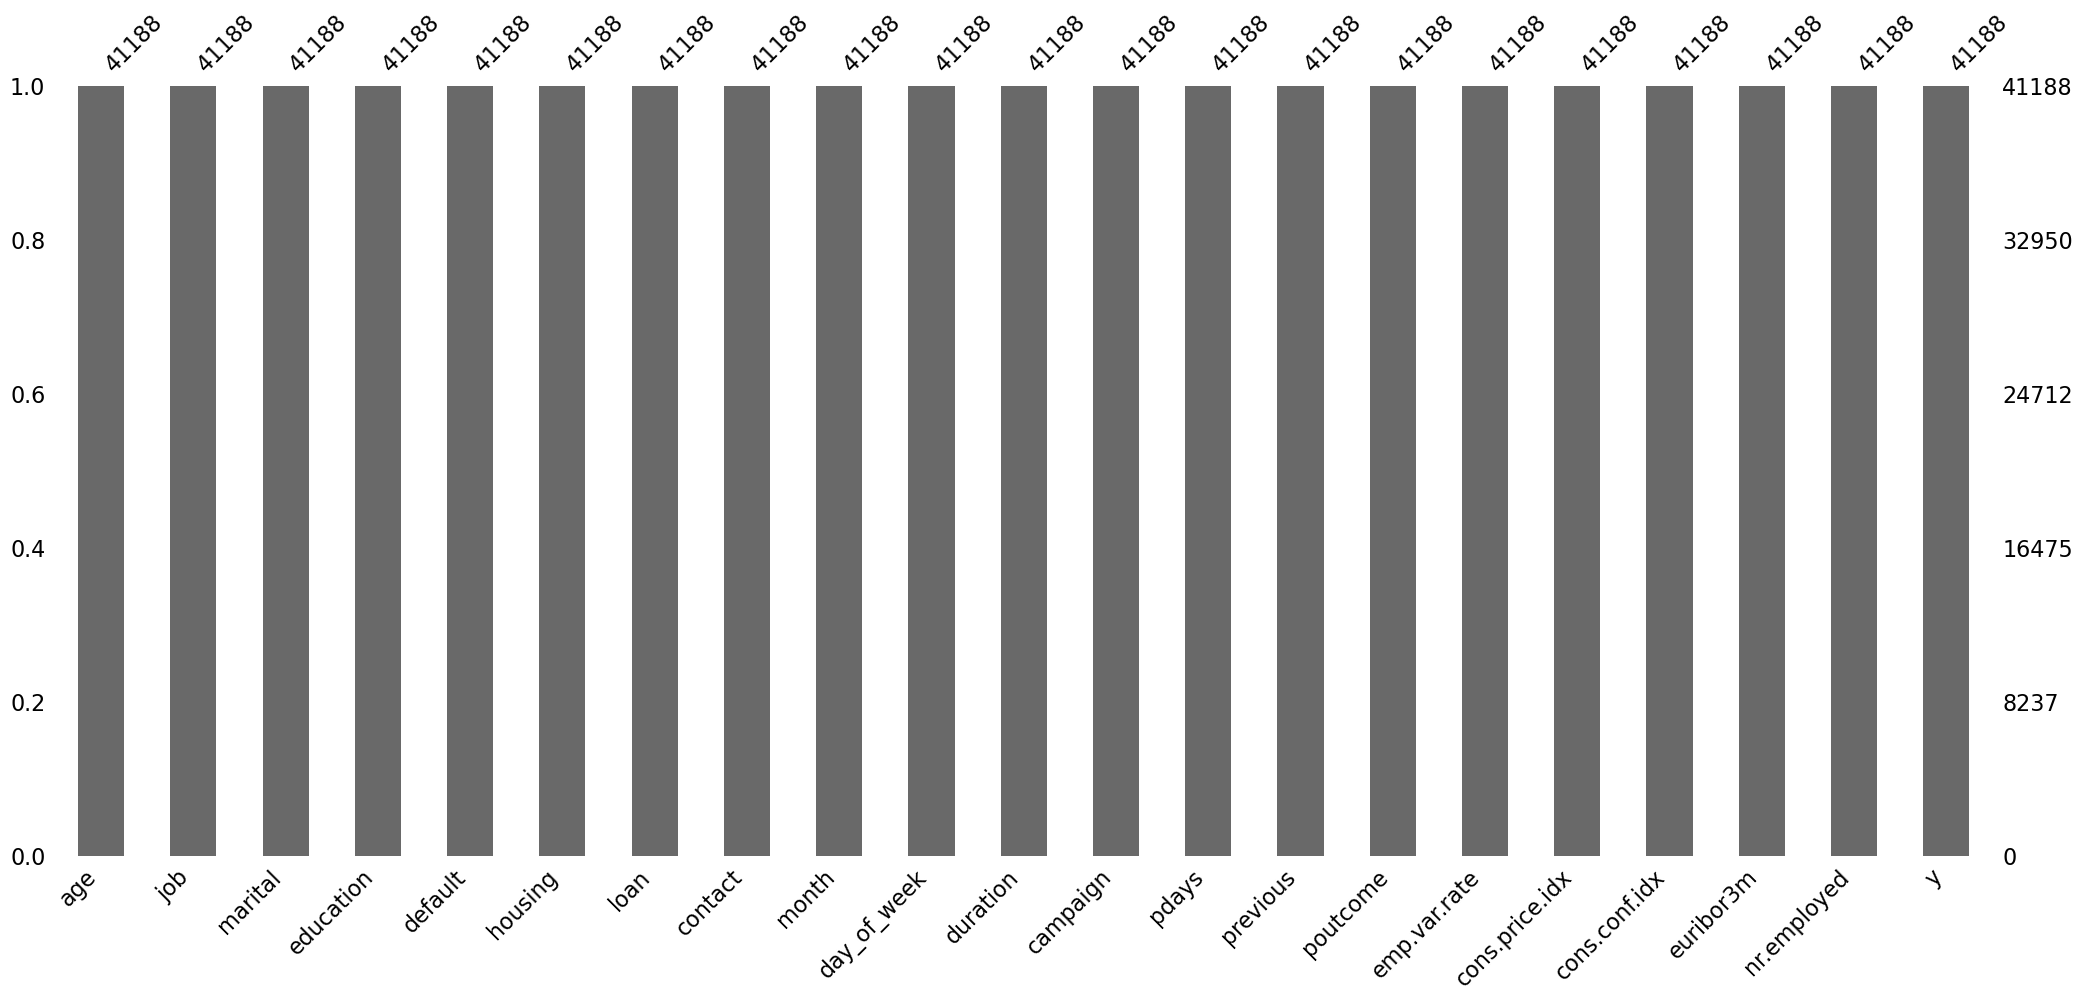

In [292]:
# Visualize the amount of missing values across the dataset features
msno.bar(data);

<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
<b>Observation:</b> From the chart above, it is evident that there are no missing values
</div>

In [225]:
# Calculate the number of null values for each column
null_counts = data.isnull().sum()

# Calculate the percentage of null values for each column
null_percent = (null_counts / len(data)) * 100

# Combine the results into a DataFrame
null_df = pd.DataFrame({'Null Counts': null_counts, '% Null': null_percent}).sort_values(by='Null Counts', ascending=False)

print(null_df)


                Null Counts  % Null
age                       0     0.0
campaign                  0     0.0
nr.employed               0     0.0
euribor3m                 0     0.0
cons.conf.idx             0     0.0
cons.price.idx            0     0.0
emp.var.rate              0     0.0
poutcome                  0     0.0
previous                  0     0.0
pdays                     0     0.0
duration                  0     0.0
job                       0     0.0
day_of_week               0     0.0
month                     0     0.0
contact                   0     0.0
loan                      0     0.0
housing                   0     0.0
default                   0     0.0
education                 0     0.0
marital                   0     0.0
y                         0     0.0


<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
<b>Observation:</b> It appears that no features have null values.
</div>

### Checking 0 values

In [226]:
data.eq(0).sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
<b>Observation:</b> Both pdays and previous exhibit a considerable number of 0 values. I will attempt to compute missing values or, if not feasible, consider dropping the affected entries.
</div>

### Checking Unique Values

In [227]:
# Assemble the unique counts with the data types and null counts for greater insight
unique_counts = data.nunique(axis=0)
dtypes = data.dtypes
null_percent = (data.isna().sum() / len(data)) * 100
unique_dtypes_df = pd.DataFrame({'Unique Values': unique_counts,'Dtype': 
                                 dtypes,'% Null': null_percent}).sort_values(by='Unique Values', 
                                                                             ascending=False)
unique_dtypes_df

,Unique Values,Dtype,% Null
duration,1544,int64,0.0
euribor3m,316,float64,0.0
age,78,int64,0.0
campaign,42,int64,0.0
pdays,27,int64,0.0
cons.conf.idx,26,float64,0.0
cons.price.idx,26,float64,0.0
job,12,object,0.0
nr.employed,11,float64,0.0
month,10,object,0.0


<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
<b>Observation:</b> There seems to be a presence of categorical values, all falling under the 'object' data type. I'll need to conduct a closer examination of its values.
</div>

### Check Deuplicate values

In [228]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Display duplicate rows
print("Duplicate Rows:")
print(data[duplicate_rows])




Duplicate Rows:
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired 

# Data visualziation


## Histograms for dataset features

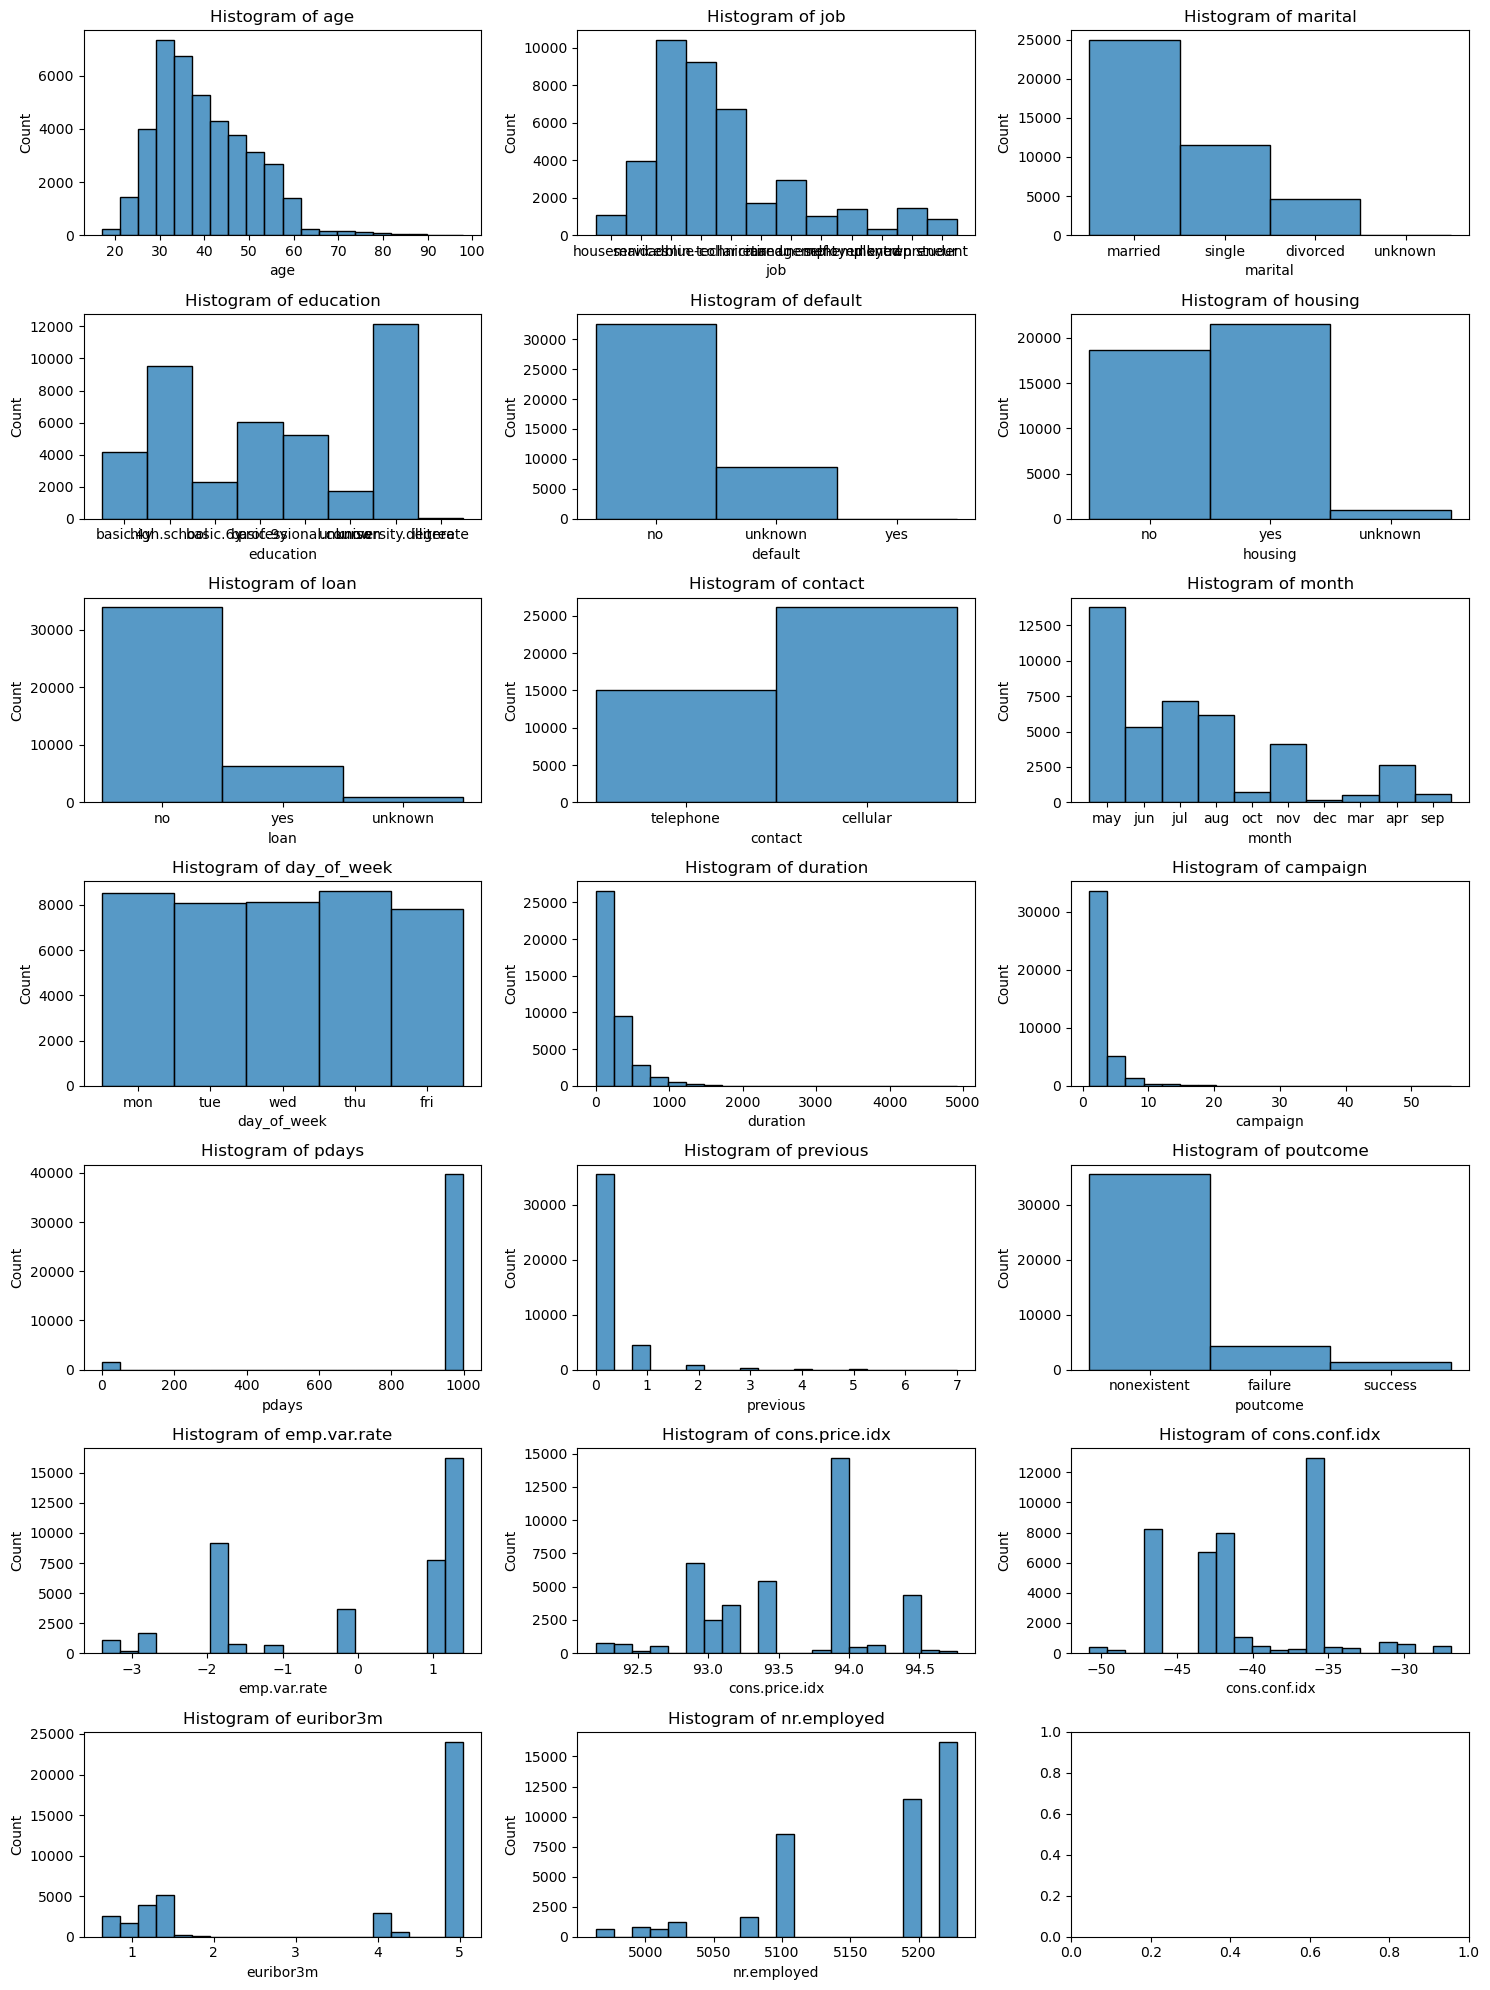

<Figure size 640x480 with 0 Axes>

In [294]:
# Select the features for which you want to create histograms
selected_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
                    'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

# Set the number of columns for the subplots
num_cols = 3
num_rows = -(-len(selected_features) // num_cols)  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = [axes]

# Create histograms for each selected feature
for idx, feature in enumerate(selected_features):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row][col]
    
    sns.histplot(data=data, x=feature, ax=ax, bins=20)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)

# Adjust layout and display
plt.tight_layout()
plt.show()
plt.savefig('images/distribution.png')


<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
<b>Observation:</b> The customer age and previous days has some outliers and they will be handled.
</div>

## Finding outliers

In [230]:
# Define a function to find outliers in a column
def find_outliers(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    return outliers

# Find outlier columns in the dataset
outlier_columns = []
for column in data.columns:
    if data[column].dtype != 'object':  # Exclude object (non-numeric) columns
        outliers = find_outliers(data[column])
        if len(outliers) > 0:
            outlier_columns.append(column)

print("Outlier Columns:", outlier_columns)



Outlier Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']


<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
    <b>Observation:</b> The columns with outliers include 'age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx'
</div>

## Plot outliers

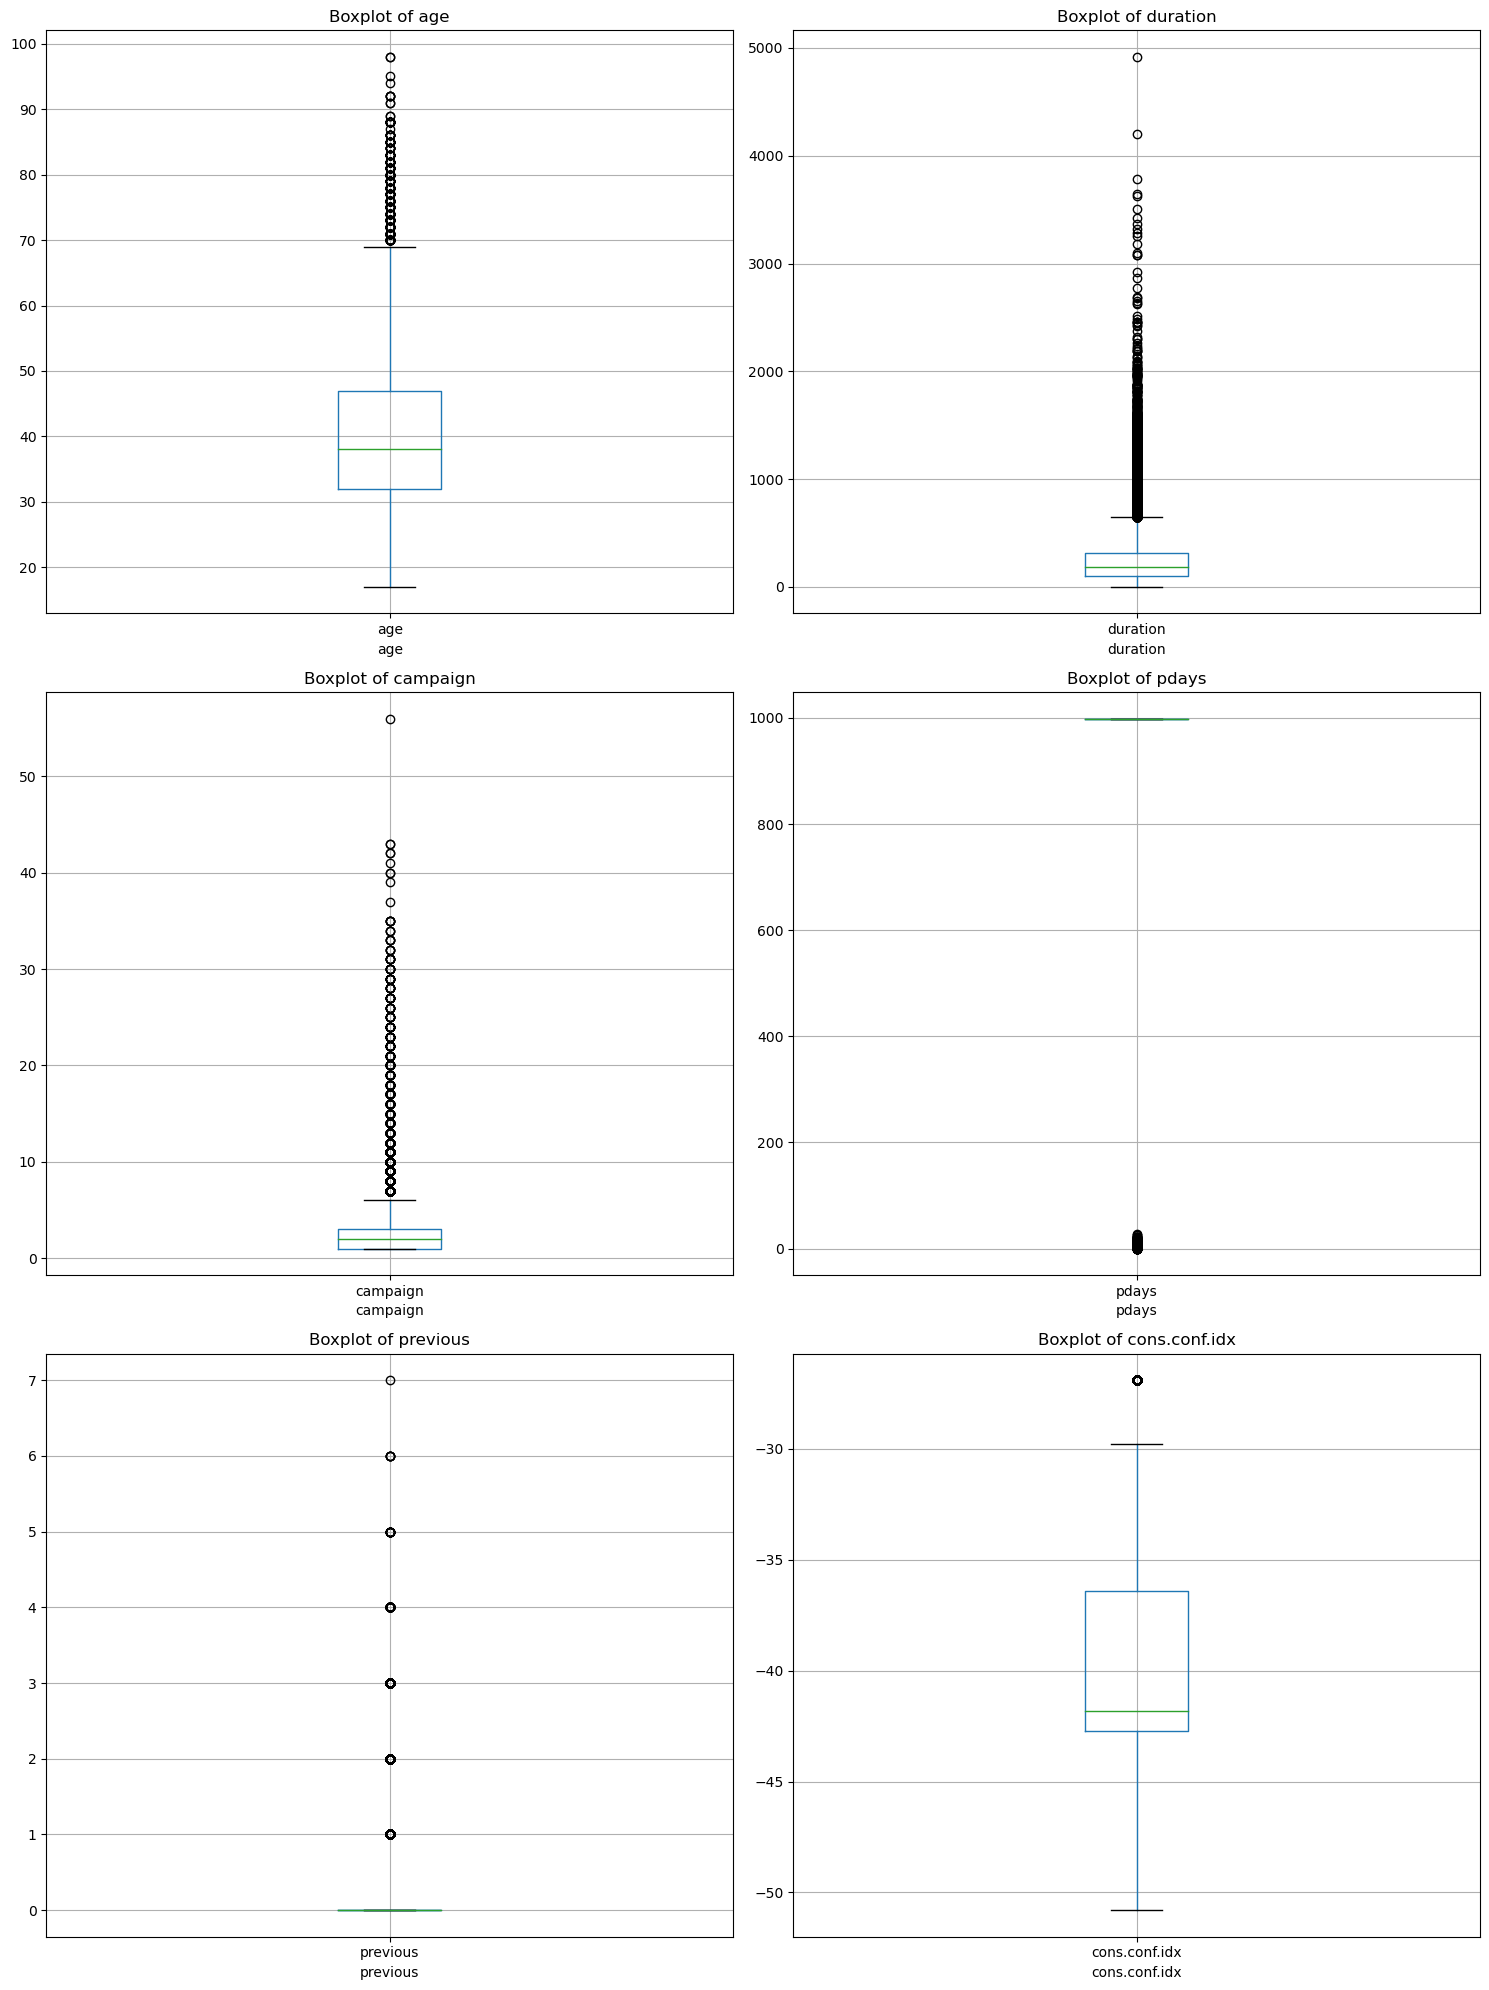

<Figure size 640x480 with 0 Axes>

In [295]:
# Create subplots for each outlier column
num_cols = 2
num_rows = -(-len(outlier_columns) // num_cols)  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
if num_rows == 1:
    axes = [axes]

for idx, column in enumerate(outlier_columns):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row][col]
    
    data.boxplot(column=column, ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()
plt.savefig('images/outliers_1.png')

## Finding corelations of all data attributes with target variable

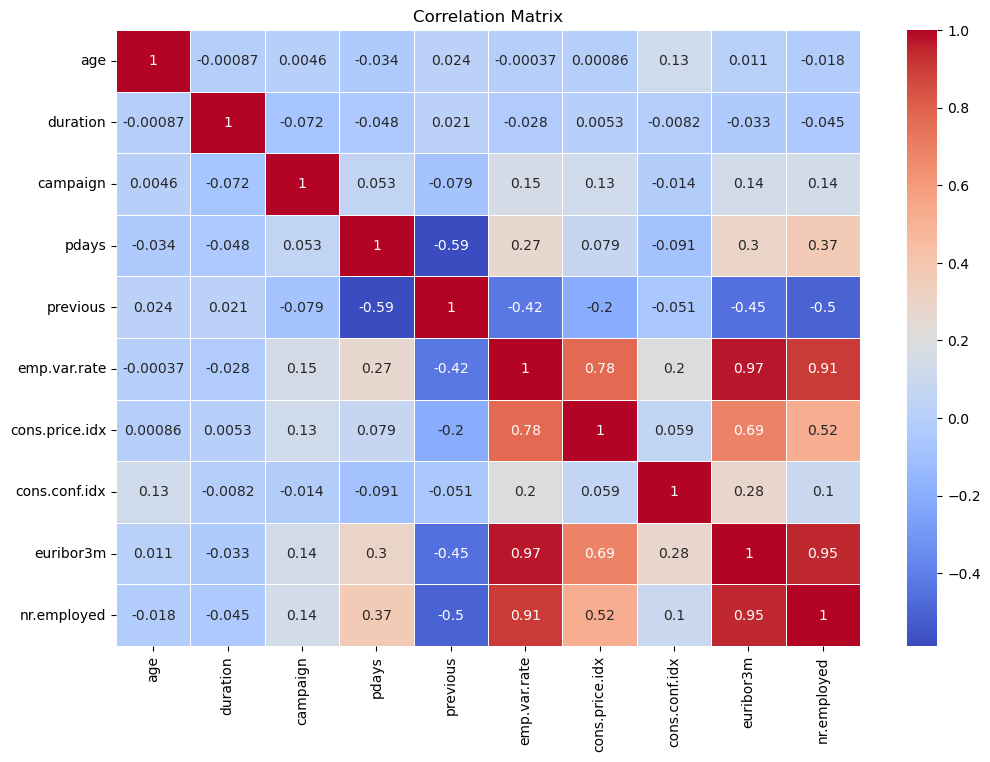

<Figure size 640x480 with 0 Axes>

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the 'y' column from the DataFrame
X = data.drop('y', axis=1)

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
plt.savefig('images/corelation-1.png')



# Data Preparation

## Data Cleaning

In [233]:
# Create copy of dataset for cleaning
data_clean = pd.DataFrame.copy(data)
data_clean.shape

(41188, 21)

### Remove Duplicate Values

In [234]:
# Drop duplicate rows
df_no_duplicates = data_clean.drop_duplicates()
print('Check the size of DF after dropping:',data_clean.shape)

Check the size of DF after dropping: (41188, 21)


In [235]:
data_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Remove outliers 

In [236]:
#columns = ['age','pdays','duration', 'campaign','previous', 'cons.conf.idx']
# Set options to display all value counts
#pd.set_option('display.max_rows', None)  # Display all rows
#pd.set_option('display.max_columns', None)  # Display all columns

# Get value counts for all columns
#for col in columns:
 #   counts = data_clean[col].value_counts().sort_index()
 #   print(f"Value counts for column '{col}':")
 #   print(counts)
 #   print()

# Reset options to default values if needed
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

### Filter based on thresholds

### Filter the customers whose age is less than 90 and more than 15 years.

In [237]:
# Now, filter the rows where 'age' is less than 100
data_clean = data_clean[(data_clean['age'] < 90) & (data_clean['age'] > 15)]
# Print the value counts
print(data_clean['age'].value_counts().sort_index())
data_clean.shape

17      5
18     28
19     42
20     65
21    102
     ... 
85     15
86      8
87      1
88     22
89      2
Name: age, Length: 73, dtype: int64


(41178, 21)

### Number of days that passed by after the client was last contacted. If more than 100 days ignore them

In [238]:
data_clean = data_clean[(data_clean['pdays'] > 100)]
data_clean.shape

(39667, 21)

### Client should spend atleast 30 seconds to talk

In [216]:
data_clean = data_clean[(data_clean['duration'] > 30)] 
data_clean.shape

(37956, 21)

### If number of contacts less than 20 for a campaign then ignore them

In [239]:
data_clean = data_clean[(data_clean['campaign'] <= 20)] 
data_clean.shape

(39510, 21)

### Number of contacts performed before this campaign and for this client

In [240]:
data_clean = data_clean[(data_clean['previous'] <= 5)] 
data_clean.shape

(39509, 21)

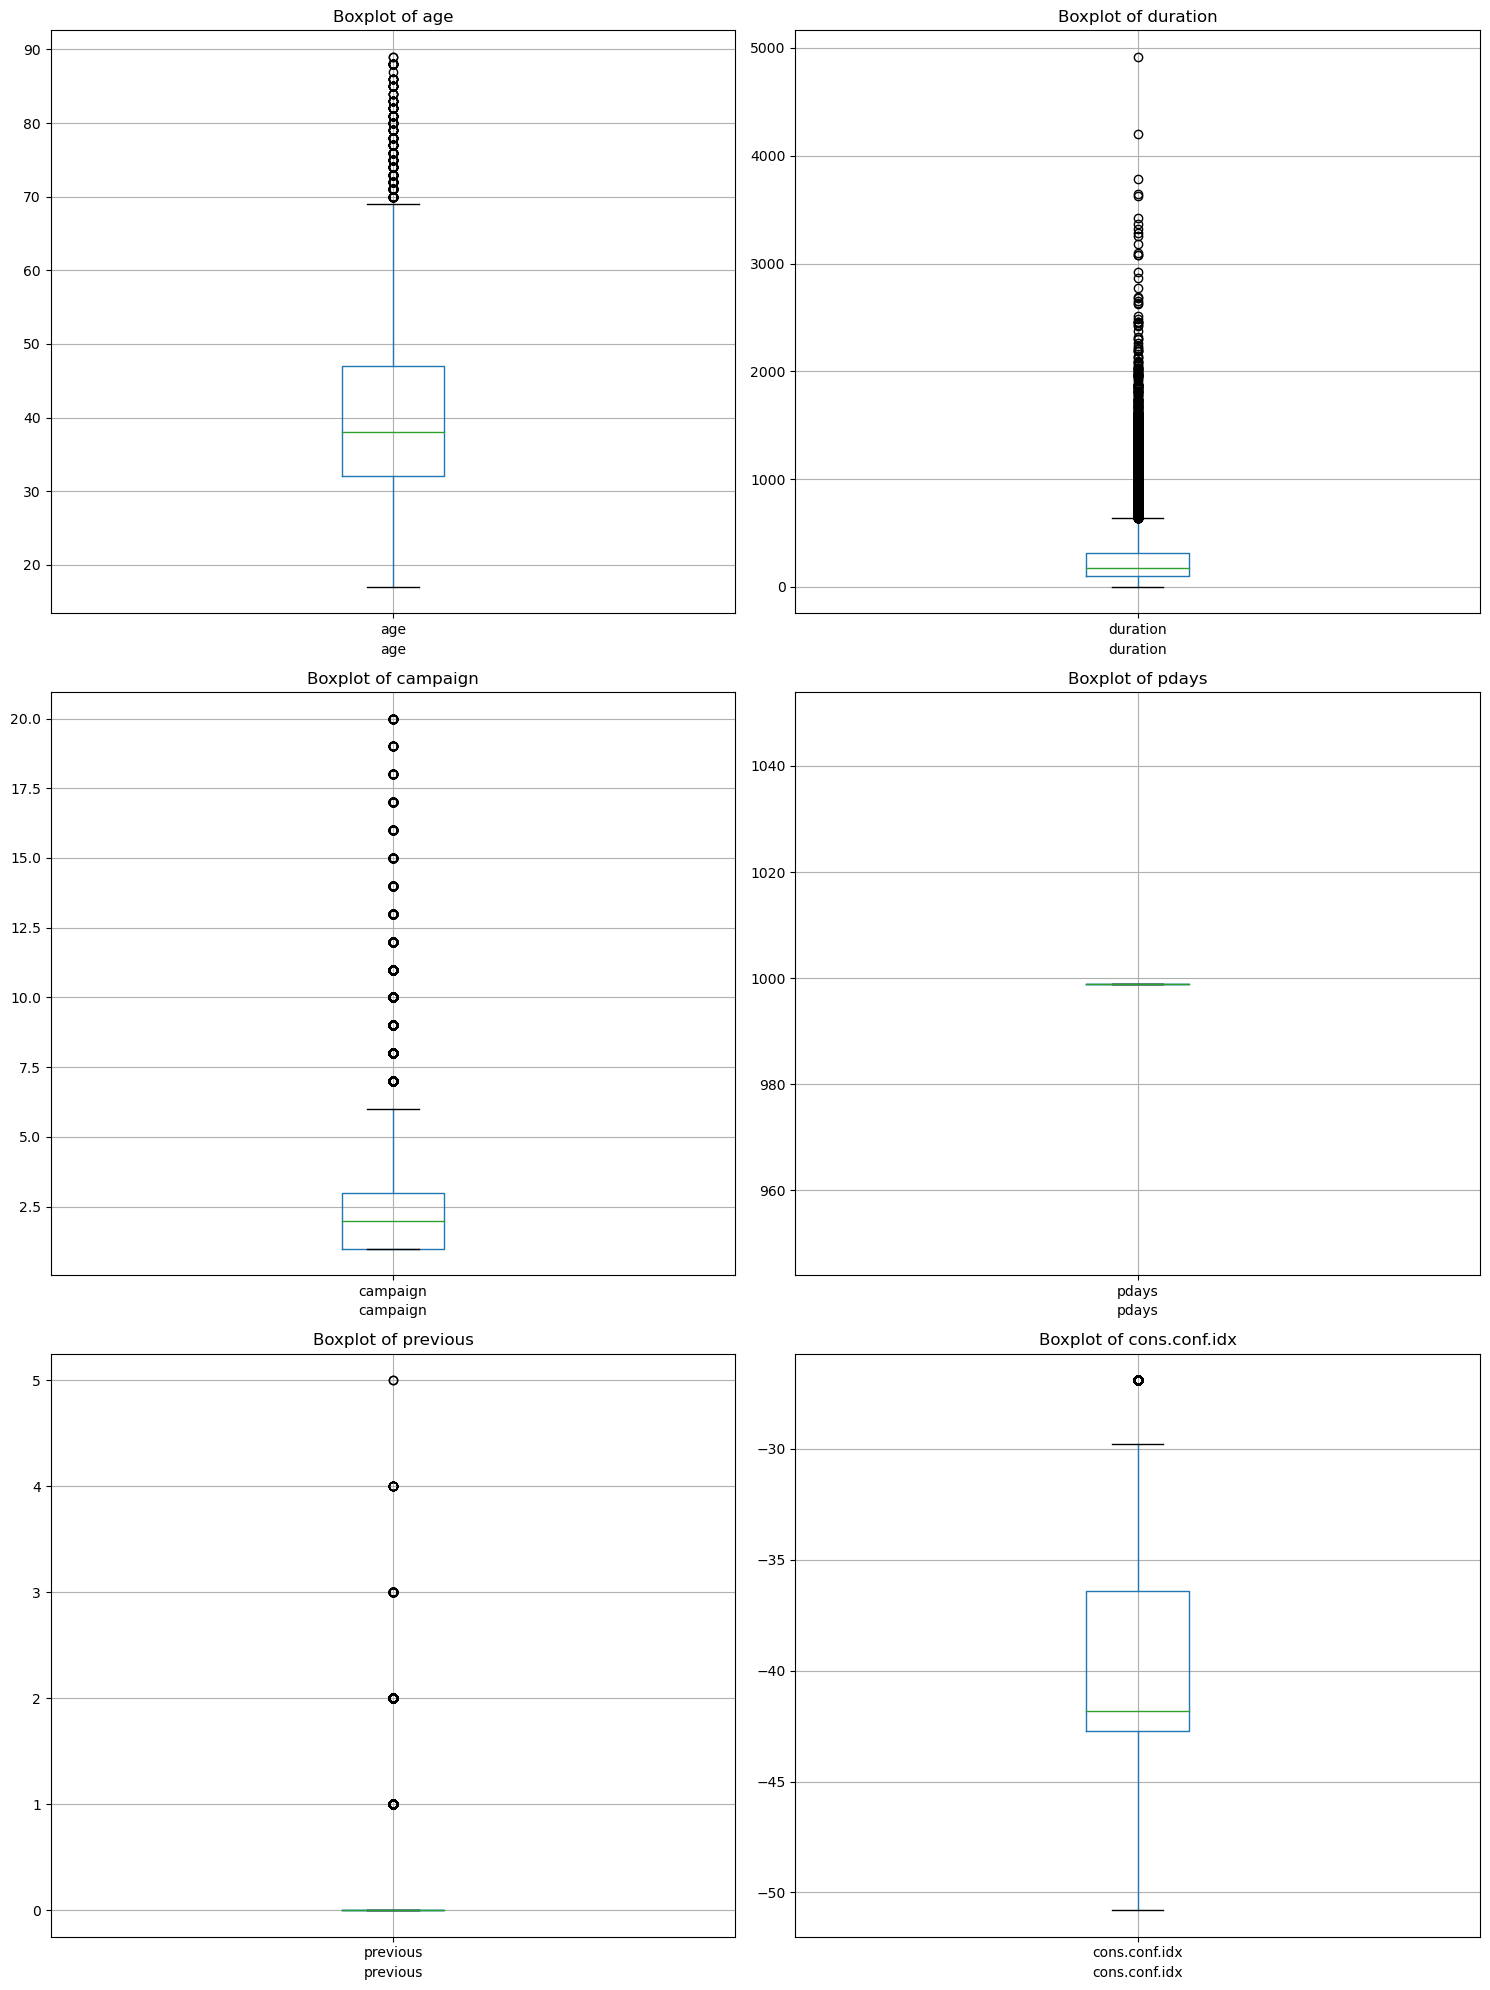

<Figure size 640x480 with 0 Axes>

In [297]:
# Create subplots for each outlier column
num_cols = 2
num_rows = -(-len(outlier_columns) // num_cols)  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
if num_rows == 1:
    axes = [axes]

for idx, column in enumerate(outlier_columns):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row][col]
    
    data_clean.boxplot(column=column, ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()
plt.savefig('images/outlier-remove.png')

<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
    <b>Observation:</b> After cleaning outliers the plot looks good 
</div>

### Fill Categorical Missing Values

In [242]:
# Get categorical columns
categorical_columns = data_clean.select_dtypes(include=['object']).columns.tolist()
# Fill all missing categorical columns with value 'other'
for categorical in categorical_columns:
    data_clean[categorical].fillna("other",inplace=True)

### Fill Numerical Missing Values

In [243]:
# Count the number of NaN values in each column
nan_count = data_clean.isna().sum()

# Print the columns with NaN values and their respective counts
columns_with_nan = nan_count[nan_count > 0]
print(columns_with_nan)

Series([], dtype: int64)


In [244]:
# Get the list of all column names from headers and print missing values
def print_missing_column_values(df):
    column_headers = list(data_clean.columns.values)
    print("The Column Header :", column_headers)
    for column in column_headers:
        missing_count_man_model = df[column].isnull().sum()
        print(column + " - Total count of missing values:", missing_count_man_model)

In [125]:
print_missing_column_values(data_clean)

The Column Header : ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
age - Total count of missing values: 0
job - Total count of missing values: 0
marital - Total count of missing values: 0
education - Total count of missing values: 0
default - Total count of missing values: 0
housing - Total count of missing values: 0
loan - Total count of missing values: 0
contact - Total count of missing values: 0
month - Total count of missing values: 0
day_of_week - Total count of missing values: 0
duration - Total count of missing values: 0
campaign - Total count of missing values: 0
pdays - Total count of missing values: 0
previous - Total count of missing values: 0
poutcome - Total count of missing values: 0
emp.var.rate - Total count of missing values: 0
cons.price.idx - Total count of missing values:

In [245]:
mode_value = data_clean['default'].mode()[0]
data_clean['default'].fillna(mode_value, inplace=True)

mode_value = data_clean['housing'].mode()[0]
data_clean['housing'].fillna(mode_value, inplace=True)

mode_value = data['loan'].mode()[0]
data_clean['loan'].fillna(mode_value, inplace=True)

In [246]:
# Evaluate impact on data set
data_retention = len(data_clean) / len(data) * 100
print(f"Amount of original data set retained after cleaning: {data_retention:.2f}%")

Amount of original data set retained after cleaning: 95.92%


# Data Encoding

## Binay Encoding

In [247]:
from sklearn.preprocessing import LabelEncoder


# List of column names with "yes" and "no" values to convert
columns_to_convert = ['y', 'default', 'housing','loan'] 

# Define a mapping dictionary for "yes" and "no"
mapping = {'yes': 1, 'no': 0}

# Loop through the specified columns and apply the mapping
for col in columns_to_convert:
    data_clean[col] = data_clean[col].map(mapping)
    



## Label Encoding

In [248]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Label encoding
labels_to_convert = ['job', 'education', 'poutcome','contact','marital']  # Replace with your column names

# Loop through the specified columns and apply the mapping
for col in labels_to_convert:
    data_clean[col] = label_encoder.fit_transform(data_clean[col])

data['day_of_week'].value_counts()
# Create a mapping dictionary for 'week' values
week_mapping = {
    'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5,
    'fri': 6, 'sat': 7}

# Map 'month' values to numerical values
data_clean['day_of_week'] = data_clean['day_of_week'].map(week_mapping)


# Create a mapping dictionary for 'month' values
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
    'nov': 11, 'dec': 12
}

# Map 'month' values to numerical values
data_clean['month'] = data_clean['month'].map(month_mapping)

In [249]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39509 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39509 non-null  int64  
 1   job             39509 non-null  int64  
 2   marital         39509 non-null  int64  
 3   education       39509 non-null  int64  
 4   default         31015 non-null  float64
 5   housing         38555 non-null  float64
 6   loan            38555 non-null  float64
 7   contact         39509 non-null  int64  
 8   month           39509 non-null  int64  
 9   day_of_week     39509 non-null  int64  
 10  duration        39509 non-null  int64  
 11  campaign        39509 non-null  int64  
 12  pdays           39509 non-null  int64  
 13  previous        39509 non-null  int64  
 14  poutcome        39509 non-null  int64  
 15  emp.var.rate    39509 non-null  float64
 16  cons.price.idx  39509 non-null  float64
 17  cons.conf.idx   39509 non-null 

# Data Correlation

## Correlations matrix after cleaning data and encoding values

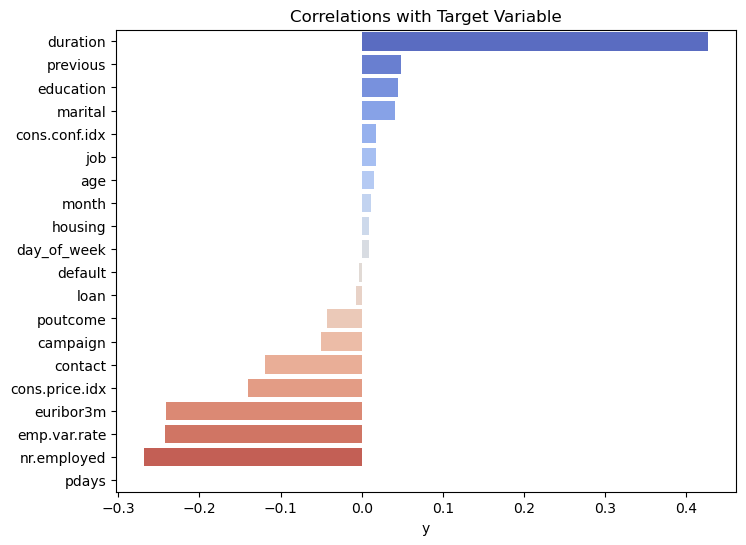

<Figure size 640x480 with 0 Axes>

In [298]:
# Plot the correlations with the target variable in a bar plot
# Calculate the correlation matrix
correlation_matrix = data_clean.corr()
plt.figure(figsize=(8, 6))
target_correlation = correlation_matrix['y'].drop('y')  # Drop the target variable correlation with itself
target_correlation = target_correlation.sort_values(ascending=False)
sns.barplot(x=target_correlation, y=target_correlation.index, palette='coolwarm')
plt.title("Correlations with Target Variable")
plt.show()
plt.savefig('images/corelation.png')

## Finding correlation of features

In [253]:
df_corr = pd.DataFrame.copy(data_clean)

In [254]:
# Double-check for any nulls/NaNs as a result of our transformations or encodings
df_corr.isna().sum().loc[lambda x: x > 0]

default    8494
housing     954
loan        954
dtype: int64

In [255]:
mode_value = df_corr['default'].mode()[0]
df_corr['default'].fillna(mode_value, inplace=True)

mode_value = df_corr['housing'].mode()[0]
df_corr['housing'].fillna(mode_value, inplace=True)

mode_value = df_corr['loan'].mode()[0]
df_corr['loan'].fillna(mode_value, inplace=True)


In [256]:
# Get the correlation matrix
#corr_matrix = df_corr.corr(numeric_only=True)

corr_matrix = df_corr.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().sort_values(ascending=False))
for index, value in enumerate(sol.items()):
    if index == 20:
        break
    print(index, value)

0 (('emp.var.rate', 'euribor3m'), 0.9747016168501773)
1 (('euribor3m', 'nr.employed'), 0.947954857074195)
2 (('previous', 'poutcome'), 0.9380933891860919)
3 (('emp.var.rate', 'nr.employed'), 0.9196944078763364)
4 (('emp.var.rate', 'cons.price.idx'), 0.7957839485861186)
5 (('cons.price.idx', 'euribor3m'), 0.7253712869829044)
6 (('contact', 'cons.price.idx'), 0.6100367646353445)
7 (('cons.price.idx', 'nr.employed'), 0.5837407346580578)
8 (('duration', 'y'), 0.4267632127208427)
9 (('poutcome', 'euribor3m'), 0.4120209335337665)
10 (('poutcome', 'emp.var.rate'), 0.4064869078392068)
11 (('previous', 'euribor3m'), 0.4008161950959643)
12 (('previous', 'nr.employed'), 0.3967155323529069)
13 (('contact', 'euribor3m'), 0.3876599980291771)
14 (('previous', 'emp.var.rate'), 0.38765910391321867)
15 (('poutcome', 'nr.employed'), 0.3870882083890002)
16 (('age', 'marital'), 0.38329128607145935)
17 (('contact', 'emp.var.rate'), 0.3818986525119886)
18 (('cons.conf.idx', 'euribor3m'), 0.3421888268614838)


### Visualize Correlation matrix

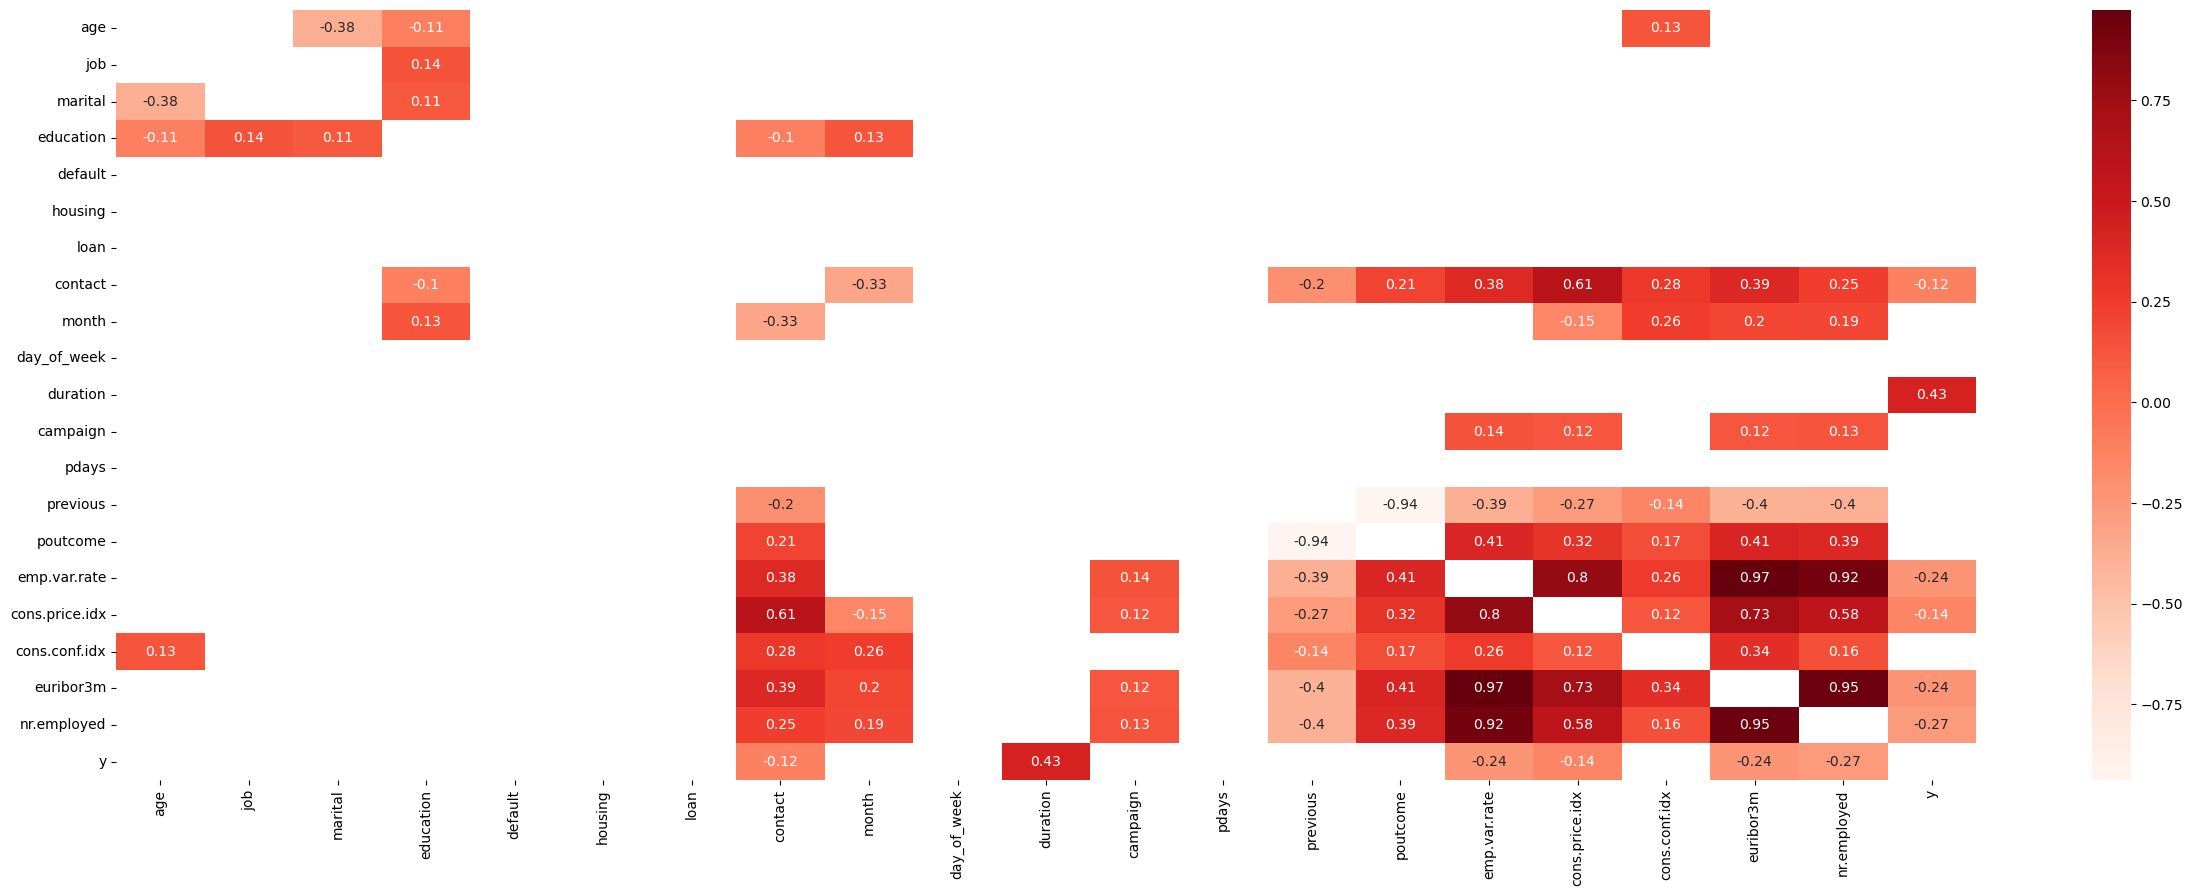

In [257]:
dfCorr = df_corr.corr()
filteredDf = dfCorr[((dfCorr >= .1) | (dfCorr <= -.1)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()


### Top 20 positive and negative correlation features

In [258]:
import numpy as np
import pandas as pd

# Assuming you have already calculated the correlation matrix df_corr
corr_matrix = df_corr.corr().abs()

# Get the upper triangle of the correlation matrix (excluding diagonal)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Get the top 10 positive correlations
top_positive_corr = upper_tri.unstack().sort_values(ascending=False)[:10]

# Get the top 10 negative correlations
top_negative_corr = upper_tri.unstack().sort_values(ascending=True)[:10]

# Extract the unique feature names from each pair
top_positive_features = [(pair[0], pair[1]) for pair in top_positive_corr.index]
top_positive_unique_features = list(set(feature for pair in top_positive_features for feature in pair))

top_negative_features = [(pair[0], pair[1]) for pair in top_negative_corr.index]
top_negative_unique_features = list(set(feature for pair in top_negative_features for feature in pair))

# Print the lists of unique feature names
print("Top 10 positive correlated unique features:")
print(top_positive_unique_features)

print("\nTop 10 negative correlated unique features:")
print(top_negative_unique_features)


Top 10 positive correlated unique features:
['y', 'emp.var.rate', 'duration', 'nr.employed', 'previous', 'contact', 'cons.price.idx', 'euribor3m', 'poutcome']

Top 10 negative correlated unique features:
['loan', 'duration', 'emp.var.rate', 'age', 'day_of_week', 'month', 'housing', 'poutcome', 'cons.conf.idx', 'job', 'euribor3m']


In [262]:
# Combine them together and add the target variable
top_features = top_positive_unique_features + top_negative_unique_features
# Create a dataframe with just these columns
df_top_features = pd.DataFrame.copy(df_corr[top_features])
df_top_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39509 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   y               39509 non-null  int64  
 1   emp.var.rate    39509 non-null  float64
 2   duration        39509 non-null  int64  
 3   nr.employed     39509 non-null  float64
 4   previous        39509 non-null  int64  
 5   contact         39509 non-null  int64  
 6   cons.price.idx  39509 non-null  float64
 7   euribor3m       39509 non-null  float64
 8   poutcome        39509 non-null  int64  
 9   loan            39509 non-null  float64
 10  duration        39509 non-null  int64  
 11  emp.var.rate    39509 non-null  float64
 12  age             39509 non-null  int64  
 13  day_of_week     39509 non-null  int64  
 14  month           39509 non-null  int64  
 15  housing         39509 non-null  float64
 16  poutcome        39509 non-null  int64  
 17  cons.conf.idx   39509 non-null 

# Feature Selection

## RandomForestRegressor

In [263]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into features (X) and the target variable (y)
X = df_corr.drop('y', axis=1)
y = df_corr['y']

clf = RandomForestClassifier()
clf.fit(X, y)
feature_importances = clf.feature_importances_

indices = np.argsort(feature_importances)[::-1]

for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {feature_importances[indices[f]]}")



duration: 0.3675454292004441
age: 0.10983283300055438
euribor3m: 0.1013542216734454
job: 0.056128417750817505
education: 0.0497713783290971
campaign: 0.04900327539989634
day_of_week: 0.045286685301516284
nr.employed: 0.04398382864143474
marital: 0.027014141951066432
cons.price.idx: 0.025894502545232213
cons.conf.idx: 0.02388384351173763
housing: 0.021268580879660777
emp.var.rate: 0.019377477580753057
month: 0.017351179249017256
loan: 0.014375634527476203
contact: 0.0109775861948155
previous: 0.009788585155271071
poutcome: 0.007162380871569835
default: 1.823619413093103e-08
pdays: 0.0


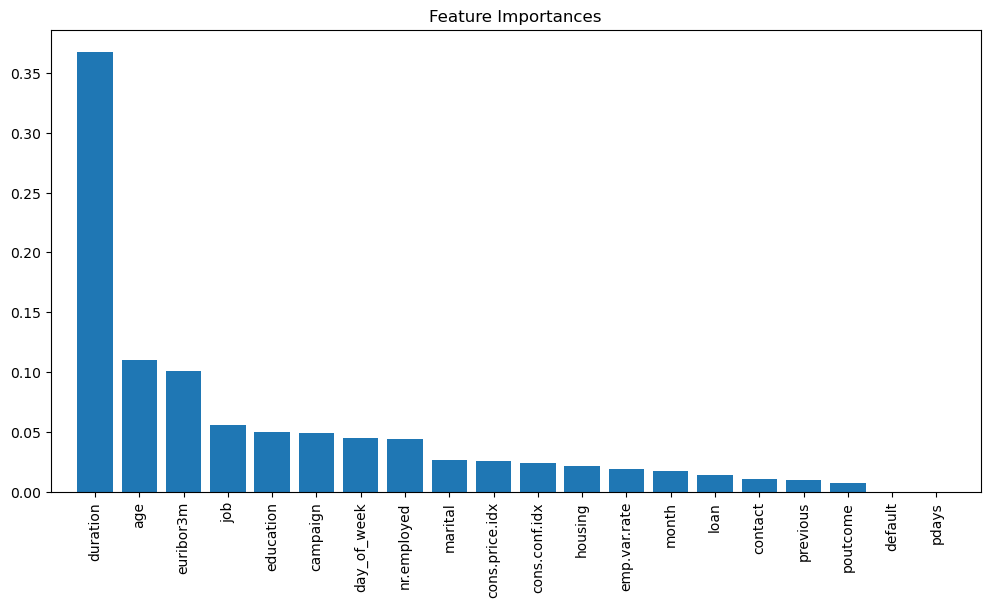

<Figure size 640x480 with 0 Axes>

In [299]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained the RandomForestClassifier and have feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
plt.savefig('images/fi.png')

# PCA

## PCA analysis

In [266]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with a specified number of components (e.g., 10 components)
n_components = 15
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio to see how much variance is explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

# Split the PCA-transformed data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Now you can apply classification algorithms to the reduced-dimension data
# For example, you can use Logistic Regression, Decision Trees, or any other classifier
# and evaluate their performance on the reduced dataset.


Explained Variance Ratios: [0.23089407 0.08173341 0.07852996 0.07309128 0.05912237 0.05567743
 0.05350809 0.05308467 0.05229882 0.05089786 0.05034266 0.0473635
 0.04274539 0.03128743 0.02146626]


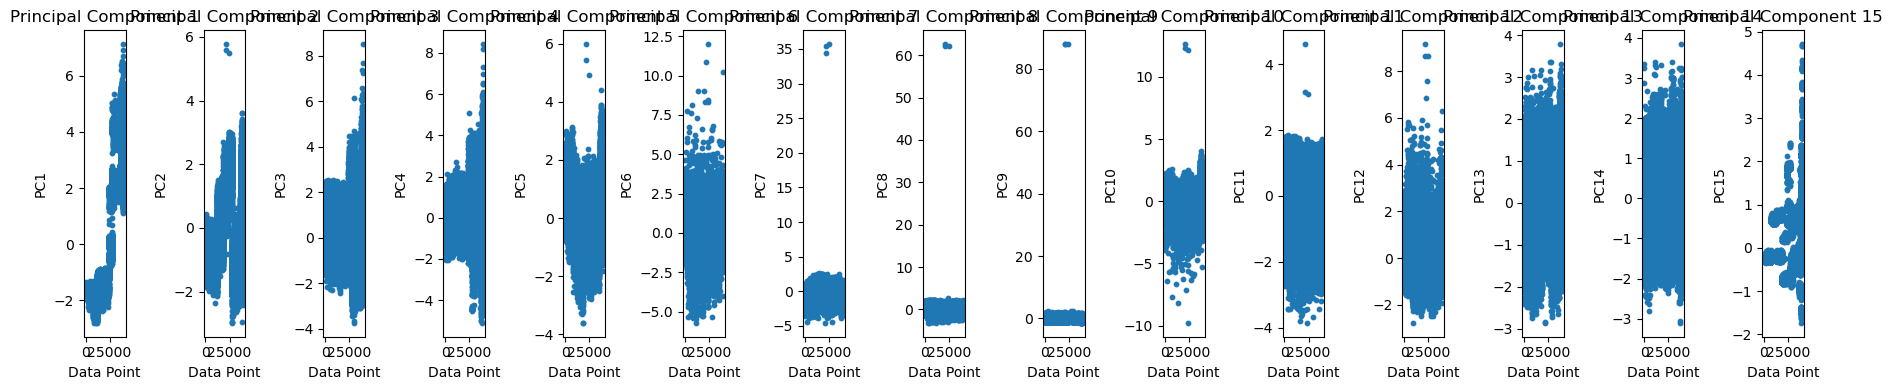

<Figure size 640x480 with 0 Axes>

In [301]:
# Assuming you have already performed PCA and stored the results in X_pca
n_components = X_pca.shape[1]

# Define the number of rows and columns for the grid
n_rows = 1  # Number of rows
n_cols = n_components  # Number of columns (one for each component)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4))

# Loop through each principal component
for i in range(n_components):
    # Select the corresponding subplot
    ax = axes[i]
    
    # Plot the principal component values
    ax.scatter(range(len(X_pca)), X_pca[:, i], s=10)
    ax.set_title(f"Principal Component {i+1}")
    ax.set_xlabel("Data Point")
    ax.set_ylabel(f"PC{i+1}")

# Automatically adjust the layout to prevent overlap
plt.tight_layout()
plt.show()
plt.savefig('images/pca.png')


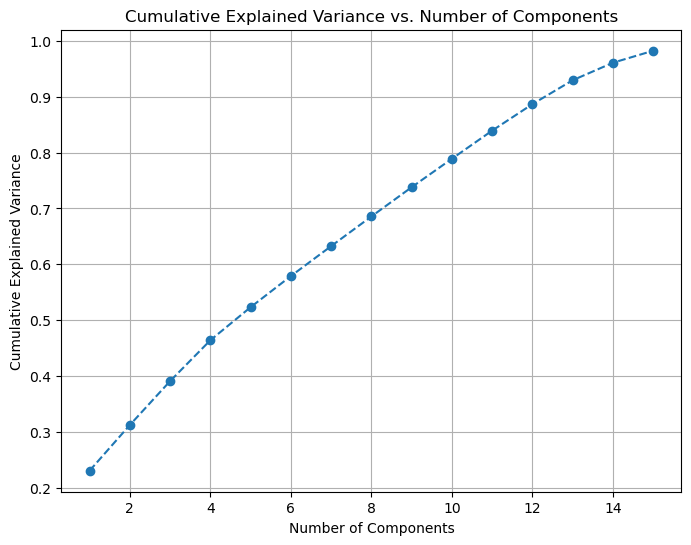

<Figure size 640x480 with 0 Axes>

In [302]:

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the correct number of components
n_components = len(cumulative_explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid()
plt.show()
plt.savefig('images/pca-tf.png')

In [275]:
# Access the loadings (coefficients) for the 16th principal component
print(len(pca.components_))
loadings = pca.components_[14]

# Create a DataFrame to associate loadings with feature names
loadings_df = pd.DataFrame({'Feature': X.columns, 'Loading': loadings})

# Sort the features by their absolute loadings in descending order
loadings_df['Absolute_Loading'] = loadings_df['Loading'].abs()
loadings_df = loadings_df.sort_values(by='Absolute_Loading', ascending=False)

# Print the top features contributing to the first principal component
print(loadings_df)

15
           Feature   Loading  Absolute_Loading
8            month  0.652758          0.652758
7          contact  0.460150          0.460150
17   cons.conf.idx -0.382250          0.382250
16  cons.price.idx  0.327919          0.327919
19     nr.employed -0.236832          0.236832
15    emp.var.rate -0.167856          0.167856
18       euribor3m -0.128734          0.128734
14        poutcome  0.069800          0.069800
13        previous -0.039899          0.039899
11        campaign  0.020896          0.020896
10        duration  0.014547          0.014547
3        education  0.012910          0.012910
6             loan  0.009770          0.009770
1              job  0.009568          0.009568
9      day_of_week -0.007935          0.007935
0              age -0.007428          0.007428
2          marital -0.006489          0.006489
5          housing  0.006228          0.006228
4          default  0.004470          0.004470
12           pdays  0.000000          0.000000


In [276]:
# Create a DataFrame to store feature names and loadings
loadings_df = pd.DataFrame({'Feature': X.columns, 'Loading': loadings})

# Sort the features by absolute loadings in descending order
loadings_df['Absolute_Loading'] = np.abs(loadings_df['Loading'])
loadings_df = loadings_df.sort_values(by='Absolute_Loading', ascending=False)

# Select the top N features with the highest absolute loadings
top_n = 6  # Replace with the desired number of top features
selected_features = loadings_df.iloc[:top_n]['Feature']

# Extract the feature matrix with only the selected features
X_selected = X[selected_features]


# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Creating datasets for modeling

## Model-Iteration 1 
#### With selected features 


In [277]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
import warnings

# Filter out ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


## LogisticRegression

In [278]:
# Define hyperparameter grids for grid search
logistic_regression_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 100],  # Add max_iter as a hyperparameter
    'penalty': ['l1', 'l2']
}


# Create a logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Train and evaluate Logistic Regression
# Create a grid search object

logistic_regression_grid = GridSearchCV(logistic_regression, logistic_regression_params, cv=5, scoring='accuracy')
logistic_regression_grid.fit(X_train, y_train)
logistic_regression_pred = logistic_regression_grid.predict(X_test)
lr_accuracy = accuracy_score(y_test, logistic_regression_pred)
lr_precision = precision_score(y_test, logistic_regression_pred)
lr_recall = recall_score(y_test, logistic_regression_pred)
lr_f1 = f1_score(y_test, logistic_regression_pred)


## Decision Tree Classifier

In [280]:
# Define the hyperparameter grid for Decision Tree
decision_params = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Maximum number of features to consider for a split
}

decision_tree = DecisionTreeClassifier()

# Create the GridSearchCV object for Decision Tree
decision_tree_grid_search = GridSearchCV(decision_tree, decision_params, cv=5, scoring='accuracy')

# Fit the grid search to your data
decision_tree_grid_search.fit(X_train, y_train)

# Make predictions using the best model (you had a typo in your code, use decision_tree_grid_search instead of decision_tree)
decision_tree_pred = decision_tree_grid_search.predict(X_test)

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, decision_tree_pred)
dt_precision = precision_score(y_test, decision_tree_pred)
dt_recall = recall_score(y_test, decision_tree_pred)
dt_f1 = f1_score(y_test, decision_tree_pred)


## KNeighbors Classifier 

In [281]:
k_neighbors_params = {
    'n_neighbors': [3, 5, 7, 9]
}
k_neighbors = KNeighborsClassifier()

# Train and evaluate KNN
k_neighbors_grid = GridSearchCV(k_neighbors, k_neighbors_params, cv=5, scoring='accuracy')
k_neighbors_grid.fit(X_train, y_train)
knn_pred = k_neighbors_grid.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

In [282]:
svc = SVC()

svc_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100]
}
# Train and evaluate SVM
svc_grid = GridSearchCV(svc, svc_params, cv=5, scoring='accuracy')
svc_grid.fit(X_train, y_train)
svm_pred = svc_grid.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)


## Compare Results for various classifiers

In [284]:
# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM'],
    'Accuracy': [lr_accuracy, dt_accuracy, knn_accuracy, svm_accuracy],
    'Precision': [lr_precision, dt_precision, knn_precision, svm_precision],
    'Recall': [lr_recall, dt_recall, knn_recall, svm_recall],
    'F1 Score': [lr_f1, dt_f1, knn_f1, svm_f1]
})

# Display the results
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.907112   0.000000  0.000000  0.000000
1        Decision Tree  0.905720   0.412698  0.035422  0.065245
2                  KNN  0.901164   0.405622  0.137602  0.205493
3                  SVM  0.907112   0.000000  0.000000  0.000000


## Model-Iteration 2
#### With all PCA features
### LogisticRegression

In [286]:
# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [287]:

# Define hyperparameter grids for grid search
logistic_regression_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 100],  # Add max_iter as a hyperparameter
    'penalty': ['l1', 'l2']
}

# Create a logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Train and evaluate Logistic Regression
# Create a grid search object
logistic_regression_grid = GridSearchCV(logistic_regression, logistic_regression_params, cv=5, scoring='accuracy')
logistic_regression_grid.fit(X_train_pca, y_train_pca)
logistic_regression_pred = logistic_regression_grid.predict(X_test_pca)

# Evaluate the model
lr_accuracy = accuracy_score(y_test_pca, logistic_regression_pred)
lr_precision = precision_score(y_test_pca, logistic_regression_pred)
lr_recall = recall_score(y_test_pca, logistic_regression_pred)
lr_f1 = f1_score(y_test_pca, logistic_regression_pred)

print("Accuracy:", lr_accuracy) 
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)


Accuracy: 0.9143254872184258
Precision: 0.5850746268656717
Recall: 0.2670299727520436
F1 Score: 0.36669784845650144


### KNeighborsClassifier

In [289]:
k_neighbors_params = {
    'n_neighbors': [3, 5, 7, 9]
}
k_neighbors = KNeighborsClassifier()

# Train and evaluate KNN
k_neighbors_grid = GridSearchCV(k_neighbors, k_neighbors_params, cv=5, scoring='accuracy')
k_neighbors_grid.fit(X_train_pca, y_train_pca)
knn_pred = k_neighbors_grid.predict(X_test_pca)
knn_accuracy = accuracy_score(y_test_pca, knn_pred)
knn_precision = precision_score(y_test_pca, knn_pred)
knn_recall = recall_score(y_test_pca, knn_pred)
knn_f1 = f1_score(y_test_pca, knn_pred)

print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

Accuracy: 0.9106555302455075
Precision: 0.5370370370370371
Recall: 0.276566757493188
F1 Score: 0.36510791366906475


### DecisionTreeClassifier

In [290]:
# Define the hyperparameter grid for Decision Tree
decision_params = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Maximum number of features to consider for a split
}
# X_train_pca, X_test_pca, y_train_pca, y_test_pca
decision_tree = DecisionTreeClassifier()

# Create the GridSearchCV object for Decision Tree
decision_tree_grid_search = GridSearchCV(decision_tree, decision_params, cv=5, scoring='accuracy')

# Fit the grid search to your data
decision_tree_grid_search.fit(X_train_pca, y_train_pca)

# Make predictions using the best model (you had a typo in your code, use decision_tree_grid_search instead of decision_tree)
decision_tree_pred = decision_tree_grid_search.predict(X_test_pca)

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test_pca, decision_tree_pred)
dt_precision = precision_score(y_test_pca, decision_tree_pred)
dt_recall = recall_score(y_test_pca, decision_tree_pred)
dt_f1 = f1_score(y_test_pca, decision_tree_pred)
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)


Accuracy: 0.904707668944571
Precision: 0.47884187082405344
Recall: 0.29291553133514986
F1 Score: 0.36348267117497884


### Compare Results for various classifiers

In [291]:
# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM'],
    'Accuracy': [lr_accuracy, dt_accuracy, knn_accuracy, svm_accuracy],
    'Precision': [lr_precision, dt_precision, knn_precision, svm_precision],
    'Recall': [lr_recall, dt_recall, knn_recall, svm_recall],
    'F1 Score': [lr_f1, dt_f1, knn_f1, svm_f1]
})

# Display the results
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.914325   0.585075  0.267030  0.366698
1        Decision Tree  0.904708   0.478842  0.292916  0.363483
2                  KNN  0.910656   0.537037  0.276567  0.365108
3                  SVM  0.907112   0.000000  0.000000  0.000000


# Deployment


## Summary of Classification Models for Term Deposit Subscription

Background:
The objective is to create a predictive model to determine whether a client will subscribe to a term deposit, with the binary target variable "y" representing subscription outcomes.

## Models Evaluated:

### Logistic Regression:

Accuracy: 91.43%
Precision: 58.51%
Recall: 26.70%
F1 Score: 36.67%

<b>Summary:</b> Logistic Regression achieved the highest accuracy and precision among the models, making it the best choice for minimizing false positives. However, the recall is relatively low, indicating that it might miss some potential subscribers. Despite this, it provides a reasonable balance between precision and recall, making it suitable for the task.

### Decision Tree:

Accuracy: 90.47%
Precision: 47.88%
Recall: 29.29%
F1 Score: 36.35%

<b>Summary:</b> The Decision Tree model has a lower accuracy and precision than Logistic Regression. It offers slightly better recall but still falls short in achieving a well-balanced F1 Score.

### K-Nearest Neighbors (KNN):

Accuracy: 91.07%
Precision: 53.70%
Recall: 27.66%
F1 Score: 36.51%

<b>Summary:</b> KNN provides accuracy and precision close to Logistic Regression. However, it has a lower recall, which means it may also miss some potential subscribers. Like the Decision Tree, it offers a reasonably balanced F1 Score.

### Support Vector Machine (SVM):

Accuracy: 90.71%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%

<b>Summary:</b> SVM achieved the lowest results in all metrics. It has a precision and recall of zero, indicating that it didn't predict any subscribers. It's not a recommended model for this specific task.

## Recommendations

Based on the provided results and considering the trade-off between precision and recall, the Logistic Regression model is recommended for this classification task. It offers the highest precision, meaning fewer false positive predictions, and an acceptable balance with recall, which is essential for identifying subscribers. However, the choice of model should also consider specific business objectives, computational efficiency, and interpretability.

## Next Steps and Recommendations

#### Utilize Logistic Regression:

I recommend using the Logistic Regression model as it has demonstrated the highest accuracy and well-balanced precision and recall, making it suitable for our classification task.

#### Feature Engineering:

Conduct a more in-depth analysis of feature importance. Select and engineer features to potentially enhance model performance.

#### Hyperparameter Tuning:

Fine-tune the hyperparameters of the Logistic Regression model using grid search or random search. Optimizing hyperparameters can further improve model accuracy.

#### Cross-Validation:

Implement k-fold cross-validation to ensure that the model's performance is consistent across different data subsets. This helps assess its robustness and generalization capabilities.

#### Address Class Imbalance:

In the case of a significant class imbalance, consider applying techniques like oversampling or undersampling to mitigate the imbalance and improve the model's handling of minority classes.

#### Model Evaluation Metrics:

Evaluate the model using additional metrics such as ROC AUC, confusion matrix, and learning curves to gain a comprehensive understanding of its performance.

